Diego Lozoya Morales 745345

25/08/23

Actividad 2 - Sympy

# Ejercicios de optimización escalar

**Para la siguientes funciones encuentre los puntos críticos, grafique y diga si éste se trata de un máximo o mínimo, local o global.**

$f(x)=1260+117x-9x^2$

In [1]:
import sympy as sp
import numpy as np


sp.var("x")

def f(x):
    return 1260 + 117*x - 9*x**2

df = sp.diff(f(x), x)
pc = sp.solve(df, x)
pc

[13/2]

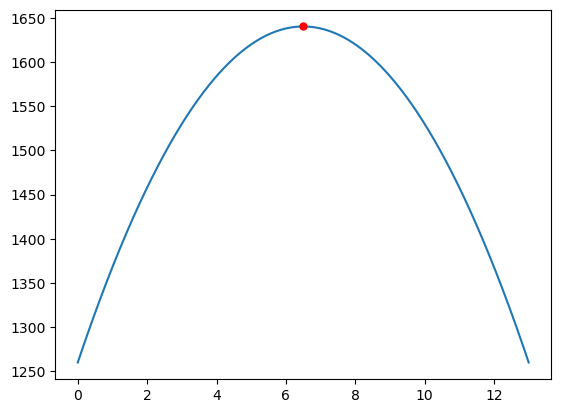

In [9]:
xn = np.linspace(0, 13, 1000)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(xn, f(xn))
for c in pc:
    plt.plot(c, f(c), ".r", ms=10)

La función tiene 1 punto crítico en 6.5 y es un máximo global

$f(x)=5+x+\frac{4}{x}$, para $x>0$

In [10]:
def g(x):
    return 5 + x + 4/x

dg = sp.diff(g(x), x)
pc = sp.solve(dg, x)
pc

[-2, 2]

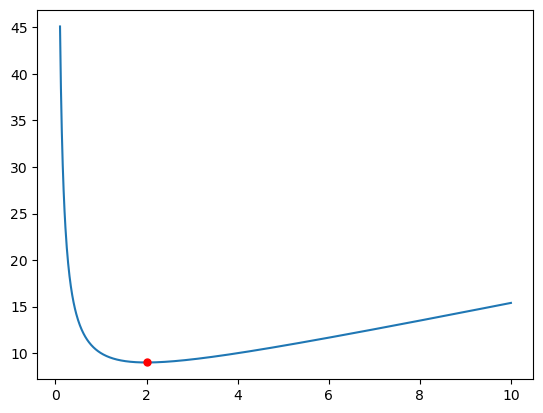

In [19]:
xn = np.linspace(0.1, 10, 1000)

plt.figure()
plt.plot(xn, g(xn))
plt.plot(pc[1], g(pc[1]), ".r", ms=10)

La función tiene 1 punto crítico en x>0 y es 2, por lo tanto es un mínimo global

$f(x)=6-2x+\sqrt{18-2x^2}$, para $-3\leq x\leq 3$

In [24]:
def h(x):
    return 6 - 2*x + (18 - 2*x**2)**(1/2)

dh = sp.diff(h(x), x)
pc = sp.solve(dh, x)
pc

[-2.44948974278318]

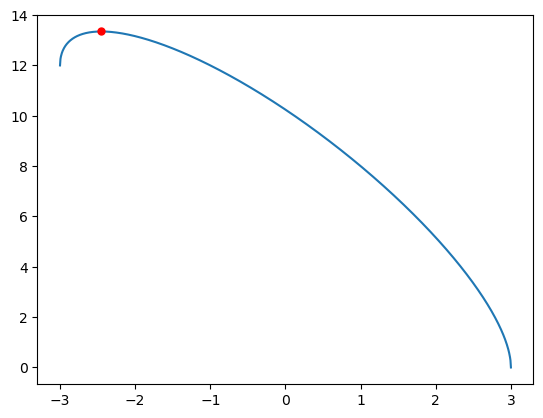

In [25]:
xn = np.linspace(-3, 3, 1000)

plt.figure()
plt.plot(xn, h(xn))
plt.plot(pc[0], h(pc[0]), ".r", ms=10)

La función tiene 1 punto crítico en -2.45 y es un máximo global

$f(x)=\frac{1}{4}x^4+\frac{1}{3}x^3-x^2$ en el intervalo $[-3,1.7]$

In [33]:
def i(x):
    return (1/4)*x**4 + (1/3)*x**3 - x**2

di = sp.diff(i(x), x)
pc = sp.solve(di, x)
pc

[-2.00000000000000, 0.0, 1.00000000000000]

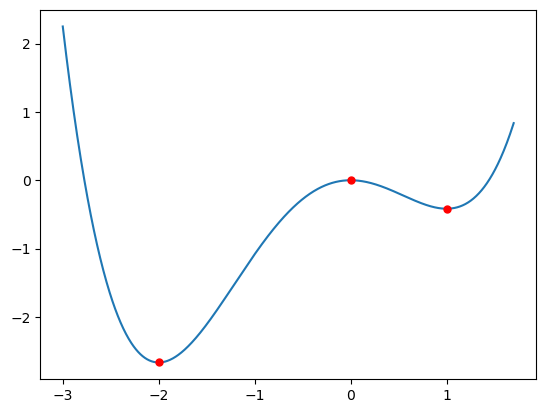

In [34]:
xn = np.linspace(-3, 1.7, 1000)

plt.figure()
plt.plot(xn, i(xn))
for c in pc:
    plt.plot(c, i(c), ".r", ms=10)

La función tiene 3 puntos críticos en -2, 0 y 1
- El punto crítico en -2 es un mínimo global
- El punto crítico en 0 es un máximo global
- El punto crítico en 1 es un mínimo local

---
**Resuelva los siguientes problemas usando la librería `SymPy`. Use celdas en `Markdown` para explicar su procedimiento.**

El perímetro de un triángulo isósceles es de $10 cm$. ¿Cuánto deben medir sus lados para que el volumen del cuerpo generado por la rotación del triángulo en torno a su base sea el mayor posible? (Volumen de un cono $= \frac{1}{3}\pi r^2 h$, donde $r$ es el radio de la base y $h$ la altura del cono).

Ya que el triángulo es isósceles, éste tiene 2 lados iguales "y" y uno diferente "x". Al su perímetro ser de 10 cm se llega a la ecuación:

In [135]:
per = x + 2*y - 10
per

x + 2*y - 10

r se puede deducir, mediante la conjetura de que x es 2 veces el radio, por lo que:

In [136]:
per_x = sp.solve(per, x)[0]
per_x

10 - 2*y

In [137]:
rad = x / 2
rad_y = rad.subs(x, per_x)
rad_y

5 - y

h se puede deducir mediante el teorema de pitágoras, utilizando a "y" (uno de los lados iguales del triangulo) como hipotenusa y "r" como uno de los catetos, de modo que:

In [138]:
sp.var("h")
sp.var("r")

alt = - y**2 + h**2 + r**2

alt_sust = alt.subs(r, rad_y)

altura = sp.solve(alt_sust, h)
print("La altura h mide " + str(altura[1]) + " cm")

La altura h mide sqrt(10*y - 25) cm


Habiendo definido estas variables se encuentra que la fórmula para calcular el volumen del cono es:

In [139]:
Vol = (1/3) * mt.pi * r**2 * h

Vol_sust1 = Vol.subs(r, rad_y)
Vol_sust2 = Vol_sust1.subs(h, altura[1])
Vol_sust2

1.0471975511966*(5 - y)**2*sqrt(10*y - 25)

Una vez teniendo esta función se puede encontrar el máximo volumen, respecto a "y"

In [140]:
import math as mt

sp.var("y")

def V(y):
    return (1/3) * mt.pi * (5 - y)**2 * (10*y - 25)**(1/2)

dV = sp.diff(V(y), y)
pc = sp.solve(dV, y)
pc

[3.00000000000000, 5.00000000000000]

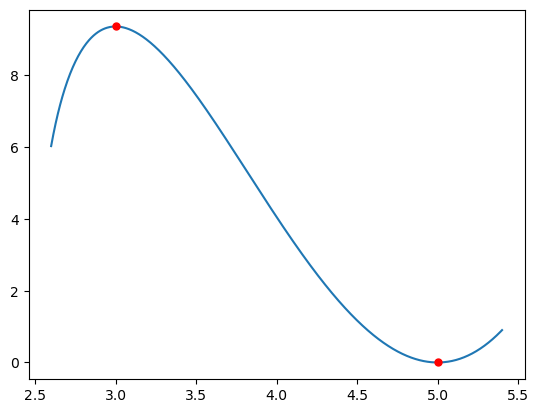

In [141]:
yn = np.linspace(2.6, 5.4, 1000)

plt.figure()
plt.plot(yn, V(yn))
for c in pc:
    plt.plot(c, V(c), ".r", ms=10)

Los valores críticos son 3 y 5. Solamente hace sentido utilizar el punto cítico en 3, ya que es un máximo y se está buscando el volumen máximo del cono. Al utilizar el punto crítico 3 se calcula el valor de x: 

In [142]:
lado_x = per_x.subs(y, pc[0])
lado_x

4.00000000000000

Lo que nos dice que el triángulo cumple con la condición de tener un perímetro de 10cm, con lados de 3, 3, 4 cada uno.

Finalmente se calcula el volumen del cono sustituyendo y = 3:

In [143]:
vol = V(3)
print("El cono tiene un volumen máximo de " + str(vol) + " cm^3")

El cono tiene un volumen máximo de 9.366419641387635 cm^3


.

Disponemos de una barra de aluminio de 6 metros para construir una portería de fútbol. Si queremos que el área de la portería sea máxima, ¿cuánto deben medir los postes y el travesaño?

Las condiciones iniciales del problema plantan que el perimetro de la portería es de 6m:

In [144]:
per = 2*x + y - 6
per

2*x + y - 6

y queremos encontrar el Área más grande posible, dada por la fórmula:

In [145]:
A = x*y
A

x*y

Del perímetro se despeja "y":

In [146]:
per_x = sp.solve(per, y)[0]
per_x

6 - 2*x

y se sutituye en la fórmula de área:

In [147]:
A_sust = A.subs(y, per_x)
A_sust

x*(6 - 2*x)

Una vez teniendo esta función se puede encontrar el área más grande:

In [148]:
def A(x):
    return 6*x - 2*x**2

dA = sp.diff(A(x), x)
pc = sp.solve(dA, x)
pc

[3/2]

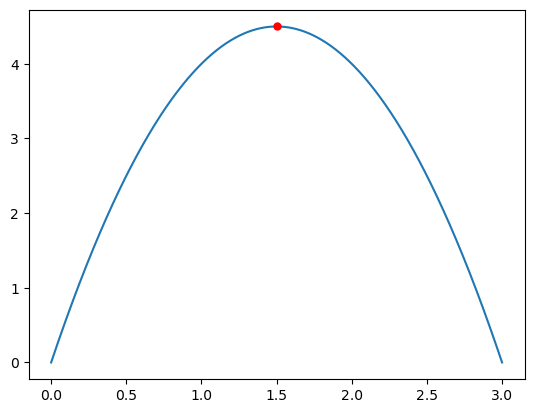

In [149]:
xn = np.linspace(0, 3, 1000)

plt.figure()
plt.plot(xn, A(xn))
for c in pc:
    plt.plot(c, A(c), ".r", ms=10)

Tiene un valor crítico en 1.5, el cual es un máximo, por lo que se puede calcular el valor de "y":

In [150]:
travesano = per_x.subs(x, pc[0])
travesano

3

Ya que se tienen todos los valore se puede calcular el área de la portería:

In [152]:
ar = A(1.5)
print("El área máxima de la portería es de " + str(ar) + " cm^2, cuando los postes miden 1.5 m c/u y el travesaño 3 m")

El área máxima de la portería es de 4.5 cm^2, cuando los postes miden 1.5 m c/u y el travesaño 3 m
